# Pandas


[_Pandas_](https://pandas.pydata.org/) is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive.  

We will learn about:
* How to create and store a dataframe.
* How to open a file.
* Some way to clean a DataFrame.
* plots

---

[_Pandas_](https://pandas.pydata.org/)  es un paquete de Python que proporciona estructuras de datos rápidas, flexibles y expresivas diseñadas para que el trabajo con datos "relacionales" o "etiquetados" sea fácil e intuitivo.

Vamos a aprender sobre:
* Cómo crear y almacenar un marco de datos.
* Cómo abrir un archivo.
* Alguna forma de limpiar un DataFrame.
* Gráficas.

## Import Pandas / Importar Pandas

In [1]:
import pandas as pd

We also import other packages that we're going use in this notebook / Tambien importamos otros paquete que usaremos en este notebook

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

## How to create data? / Como crear datos?

### DataFrame

A DataFrame is a two-dimensional data structure, that is, the data is tabularly aligned in rows and columns. 
One way to create a DataFrame is through a dictionary.
 
---

Un DataFrame es una estructura de datos bidimensional, es decir, los datos se alinean de forma tabular en filas y columnas.
Una forma de crear un DataFrame es a través de un diccionario.

In [3]:
dictionary_data = {
    "Rocío": ["Peruana", "USA", 40],
    "Clara": ["Venezolana", "UK", 25],
    "Agustina": ["Argentina", "Canada", 36]
}    

data_frame = pd.DataFrame(dictionary_data)

print(data_frame)

     Rocío       Clara   Agustina
0  Peruana  Venezolana  Argentina
1      USA          UK     Canada
2       40          25         36


As we can see, the indices go in ascending order starting from 0, but this can be changed using `index` when building the dataframe.

---

Como vemos, los indices van en orden ascendente a partir de 0, pero esto se puede cambiar usando `index` al construir el dataframe.

In [4]:
data_frame = pd.DataFrame(
    dictionary_data, 
    index=["Paìs de origen", "Lugar de residencia", "Edad"]
)

data_frame

,Rocío,Clara,Agustina
Paìs de origen,Peruana,Venezolana,Argentina
Lugar de residencia,USA,UK,Canada
Edad,40,25,36


To save the DataFrame with `csv` / Para guardar un DadaFrame como `csv`

In [5]:
data_frame.to_csv("miembros.csv")

See de Pandas documentation to find other methos to save a DataFrame.

---

Investigue la documentación de Pandas para encontrar otros metodos para guardar un DataFrame.

### Series

If the DataFrame is a table, a `Series` is a "column" and can be created from a list.

----

Si el DataFrame es una tabla, una `Serie` es una "columna" y se puede crear a partir de una lista.

In [6]:
col = pd.Series([0, 40, 400])

col

0      0
1     40
2    400
dtype: int64

A `Series` is essentially a simple column of a DataFrame, so indexes can be assigned, however the Series does not have a column name but it has a general name` Name`

---

Una `Serie` es en esencia una columna simple de un DataFrame, así que se pueden asignar índices, sin embargo la Serie no tiene un nombre de columna sino un nombre general `Name`

In [7]:
col = pd.Series(
    [0, 40, 400], 
    index=['2015 ', '2016', '2021'], 
    name='Numero de miembros'
)

col

2015       0
2016      40
2021     400
Name: Numero de miembros, dtype: int64

## Open a File / Abrir un archivo

We are going to work with data that we have in a _.csv_ file "comma-separated values"

---

Vamos ahora a trabajar con datos que tenemos en un archivo _.csv_ "comma-separated values"

In [8]:
# Path to the file / Ruta al archivo
data_folder = Path(".") / "data"

# Open the file / Abrimos el archivo
data = pd.read_csv(data_folder / "RPC_4_lithologies_Messy.csv")

To have a look at the first 5 rows of DataFrame, we can use the `head` method. / Para echar un vistazo a las primeras 5 filas de DataFrame, podemos usar el método `head`.

In [9]:
data.head()

,Index,RPC,Source,Description,Lithology,Vs [km/s],VpVs ratio,Rho [kg/m³]
0,63,104818,RPC,KIAMICHI FORMA. 4,sandstone,1.5957,1.9086,2109.1206
1,64,104893,RPC,KIAMICHI REMOLD 3,sandstone,1.5171,1.9779,2090.0000
2,65,104652,RPC,NAVAJO ARCO 2,SANDST.,2.0415,1.6476,2131.9900
3,66,104752,RPC,NAVAJO ARCO REMOL 1,SANDST.,1.6062,1.9894,2184.9392
4,67,104598,RPC,FERRON 82-3 1677.5,sandstone,2.4486,1.7306,2472.2308


We use the `shape` attribute to know how big the DataFrame is. / Usamos el atributo `shape` para saber que tan grande es el DataFrame:

In [10]:
data.shape

(808, 8)

`DataFrame.describe()` gets the summary statistics of only the columns that have numerical data.
All other columns are ignored, unless you use the argument `include="all"`.

---

`DataFrame.describe()` obtiene las estadísticas solo de las columnas que tienen datos numéricos.
Todas las demás columnas se ignoran, a menos que use el argumento `include="all"`.

In [11]:
data.describe()

,Index,RPC,Vs [km/s],VpVs ratio,Rho [kg/m³]
count,808.000000,808.000000,808.000000,808.000000,760.000000
mean,463.107673,102277.626238,2.116353,1.887390,2319.261095
std,231.252250,1537.484250,0.747915,0.377769,255.732807
min,63.000000,100031.000000,0.441300,1.337600,1721.753500
25%,262.750000,101112.750000,1.527225,1.666075,2115.586925
50%,462.500000,102083.500000,2.202600,1.779850,2382.300000
75%,664.250000,103284.750000,2.733000,1.943675,2529.143800
max,862.000000,105090.000000,3.665000,4.707800,2823.287700


## Acceso a las columnas

If we want to access the _Description_ property of the DataFrame, this notation can be used: / Si quiero acceder a la propiedad _Description_ del DataFrame se puede usar esta notación:

In [12]:
data.Description

0        KIAMICHI FORMA. 4
1        KIAMICHI REMOLD 3
2            NAVAJO ARCO 2
3      NAVAJO ARCO REMOL 1
4       FERRON 82-3 1677.5
              ...         
803    R.PRICE 10909.5 #31
804    R.PRICE 10916.5 #38
805     R.PRICE 10883.5 #7
806    R.PRICE 10913.5 #35
807     R.PRICE 10883.5 #7
Name: Description, Length: 808, dtype: object

In [13]:
data["Description"]

0        KIAMICHI FORMA. 4
1        KIAMICHI REMOLD 3
2            NAVAJO ARCO 2
3      NAVAJO ARCO REMOL 1
4       FERRON 82-3 1677.5
              ...         
803    R.PRICE 10909.5 #31
804    R.PRICE 10916.5 #38
805     R.PRICE 10883.5 #7
806    R.PRICE 10913.5 #35
807     R.PRICE 10883.5 #7
Name: Description, Length: 808, dtype: object

Both ways to select series from a DataFrame are valid.
However the operator `[]` allows more flexibility in the name of the columns, being able to use reserved characters.
For example: If we want to access to the column called `Vs [km/s]`, `data.Vs [km/s]` notation doesn't work.

---

Ambas son dos formas de seleccionar series de un DataFrame, ambas válidas, sin embargo el operador `[]` permite más flexibilidad en el nombre de las columnas, pudiendo usar caracteres reservados.
Por ejemplo: si quisieramos ver le contenido de la columna llamada `Vs [km/s]`, la notación `data.Vs [km/s]` no funciona.

In [14]:
data["Vs [km/s]"]

0      1.5957
1      1.5171
2      2.0415
3      1.6062
4      2.4486
        ...  
803    2.7592
804    3.1168
805    2.9987
806    2.9331
807    2.8970
Name: Vs [km/s], Length: 808, dtype: float64

## Selecting values / Seleccionando valores

To access a value at the position `[i, j]` of a DataFrame, we have two options, using the index or the label.
Remember that a DataFrame provides an index as a way to identify the rows of the table; a row, then, has a position inside the table as well as a label, which uniquely identifies its entry in the DataFrame.

---

Para acceder a un valor en la posición `[i, j]` de un DataFrame, tenemos dos opciones,usando el indice o la etiqueta.
Recuerde que un DataFrame proporciona un índice como una forma de identificar las filas de la tabla; una fila, entonces, tiene una posición dentro de la tabla, así como una etiqueta, que identifica de forma única su entrada en el DataFrame.

In [15]:
data.head()

,Index,RPC,Source,Description,Lithology,Vs [km/s],VpVs ratio,Rho [kg/m³]
0,63,104818,RPC,KIAMICHI FORMA. 4,sandstone,1.5957,1.9086,2109.1206
1,64,104893,RPC,KIAMICHI REMOLD 3,sandstone,1.5171,1.9779,2090.0000
2,65,104652,RPC,NAVAJO ARCO 2,SANDST.,2.0415,1.6476,2131.9900
3,66,104752,RPC,NAVAJO ARCO REMOL 1,SANDST.,1.6062,1.9894,2184.9392
4,67,104598,RPC,FERRON 82-3 1677.5,sandstone,2.4486,1.7306,2472.2308


### Using the position / Usando la posición

Use `DataFrame.iloc[..., ...]` to select values by their position.

---

Utilice `DataFrame.iloc [..., ...]` para seleccionar valores por su posición.

In [16]:
data.iloc[0, 0]

63

In [17]:
data.iloc[:, 0]

0       63
1       64
2       65
3       66
4       67
      ... 
803    858
804    859
805    860
806    861
807    862
Name: Index, Length: 808, dtype: int64

We can use what we saw in the first notebook about indexes. / Podemos usar lo que vimos en el primer notebook sobre los índices.

### Using the label / Usando la etiqueta

Use `DataFrame.loc[..., ...]` to select values by their label.

---

Use `DataFrame.loc[..., ...]` para seleccionar valores por su etiqueta.

In [18]:
data.loc[63, "RPC"]

104585

In [19]:
data.loc[63:67, "RPC"]

63    104585
64    104609
65    104755
66    104824
67    104673
Name: RPC, dtype: int64

In [20]:
data.loc[63:67, ["RPC", "Source", "Description"]]

,RPC,Source,Description
63,104585,RPC,FERRON 82-3 1677.5
64,104609,RPC,FERRON 82-3 1677.5
65,104755,RPC,NAVAJO ARCO REMOL 1
66,104824,RPC,KIAMICHI FORMA. 4
67,104673,RPC,NAVAJO ARCO 2


### Conditional selection / Selección condicional

We use the conditional syntax to find the data that satisfies a given condition.
For example, we can check if there are densities greater than 2000 $kg/m^3$:

---

Usamos la sintaxis condicional para encontrar los datos que satisfacen una condición dada.
Por ejemplo podemos chequear si hay densidades mayores a 2000 $kg/m^3$:

In [21]:
data["Rho [kg/m³]"] > 2000

0      True
1      True
2      True
3      True
4      True
       ... 
803    True
804    True
805    True
806    True
807    True
Name: Rho [kg/m³], Length: 808, dtype: bool

We want all the data where the lithology is sandstone. / Queremos todos los datos donde la litología es arenisca.

In [22]:
data[data.Lithology=="sandstone"]

,Index,RPC,Source,Description,Lithology,Vs [km/s],VpVs ratio,Rho [kg/m³]
0,63,104818,RPC,KIAMICHI FORMA. 4,sandstone,1.5957,1.9086,2109.1206
1,64,104893,RPC,KIAMICHI REMOLD 3,sandstone,1.5171,1.9779,2090.0000
4,67,104598,RPC,FERRON 82-3 1677.5,sandstone,2.4486,1.7306,2472.2308
5,68,104601,RPC,FERRON 82-3 1677.5,sandstone,2.4387,1.7711,2458.9597
6,69,104617,RPC,FERRON 82-3 1677.5,sandstone,2.7267,1.6624,2397.1364
...,...,...,...,...,...,...,...,...
191,252,104578,RPC,FERRON 82-3 1677.5,sandstone,2.4009,1.6154,2468.3633
192,253,104849,RPC,KIAMICHI REMOLD 2,sandstone,2.4060,1.6056,2109.8846
193,254,104589,RPC,FERRON 82-3 1677.5,sandstone,2.7450,1.5734,2425.2311
195,256,104640,RPC,FERRON 82-3 1677.5,sandstone,2.8365,1.6011,2364.6583


## Cleaning our data using Pandas / Limpiando nuestra data usando Pandas

The DataFrame loaded before is a smaller dataset of lab data (Vp, Vs, Rho) for 800 samples from the _Rock Property Catalog_, which has some problems like:
* repeated rows
* missing data
* different nomenclature
* redundant information, etc.

So, before doing any plot or analysis of the DataFrame data, we need to examine the data and fix the this.

---

El DataFrame cargado antes es un conjunto mas pequeño de datos de laboratorio (Vp, Vs, Rho) para 800 muestras de un _Catalogo de Propiedades de las Rocas_. 
Éste tiene algunos problemas como:
* filas repetidas
* datos faltantes
* nomenclatura diferente
* información redundante, etc. 

Entonces, antes de realizar cualquier grafica o analisis de los datos del DataFrame, necesitamos examinar los datos y arreglar los problemas mencionados.

In [23]:
# Reload the DataFrame again to avoid errors / Recargamos otra vez el DataFrame para no tener errores
data = pd.read_csv(data_folder / "RPC_4_lithologies_Messy.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        808 non-null    int64  
 1   RPC          808 non-null    int64  
 2   Source       808 non-null    object 
 3   Description  808 non-null    object 
 4   Lithology    808 non-null    object 
 5   Vs [km/s]    808 non-null    float64
 6   VpVs ratio   808 non-null    float64
 7   Rho [kg/m³]  760 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 50.6+ KB


In [24]:
data.shape

(808, 8)

### Finding _null_ values in our DataFrame / Encontrando valores _null_ en nuestro DataFrame

We use the `isnull` method, which returns a Boolean object of the same size as the DataFrame that indicates if the values are _NaN_.
`any` returns _True_ if any element of the iterable is true.
If the iterable is empty, return _False_. 

---

Usamos el método `isnull` que devuelve un objeto booleano del mismo tamaño del DataFrame que indica si los valores son _NaN_.
`any` devuelve _True_ si algún elemento del iterable es verdadero.
Si el iterable está vacío, devuelve _False_.

In [25]:
data.isnull().values.any()

True

Now, we make a fast plot to check this. / Ahora, hacemos una gráfica rápida para chequear lo mensionado.

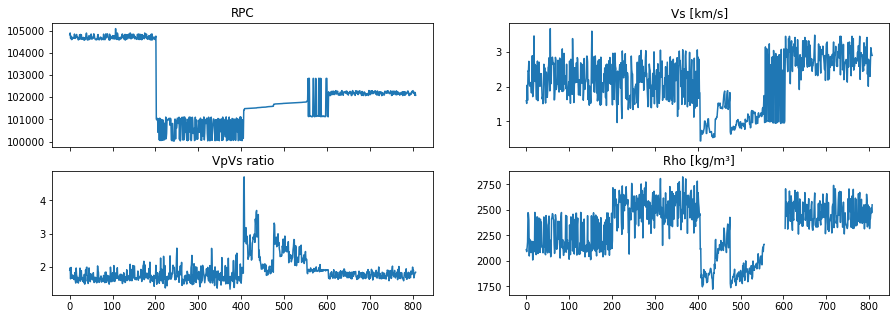

In [26]:
names = ["RPC", "Vs [km/s]", "VpVs ratio", "Rho [kg/m³]"]

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 5))
axes = axes.flatten()

for name, i in zip(names, range(axes.size)):
    data[name].plot(ax=axes[i])
    axes[i].set_title(name)
plt.show()

The density column has NaN values, so we will use the `dropna` method to remove the row which only has NaN values.

---

La columna de densidad tiene valores de NaN, por lo que usaremos el método `dropna` para eliminar la fila que solo tiene valores de NaN.

In [27]:
data = data.dropna()

data.shape

(760, 8)

We've removed 48 rows, so the DataFrame has 760 rows. / Hemos eliminado 48 filas, por lo que el DataFrame tiene 760 filas.

### Remove duplicates rows

Now, we will find and remove the duplicates rows using `duplicated()`. / Ahora vamos a encontrar y eliminar la filas repetidas usando `duplicated()`.

In [28]:
# Select duplicate rows except first occurrence based on all columns.
# Selecciona filas duplicadas excepto la primera aparición basada en todas las columnas

data[data.duplicated()]

,Index,RPC,Source,Description,Lithology,Vs [km/s],VpVs ratio,Rho [kg/m³]
77,139,104646,RPC,NAVAJO ARCO 2,SANDST.,1.8489,1.6602,2210.1729
139,200,104703,RPC,NAVAJO ARCO 3,SANDST.,2.1426,1.7459,2096.0000
378,438,100066,RPC,Hard shale,shale,2.4267,1.6081,2642.6244
384,443,101009,RPC,Gray Shale,shale,2.2070,1.3899,2664.8891
669,727,102283,RPC,R.PRICE 10928.5 #50,dolomite,2.6050,1.7128,2300.8000
677,734,102289,RPC,R.PRICE 10928.5 #50,dolomite,2.3655,1.6921,2331.2000
679,735,102169,RPC,R.PRICE 10908.5 #30,dolomite,2.6575,1.8272,2415.0000
720,775,102214,RPC,R.PRICE 10913.5 #35,dolomite,2.9757,1.8412,2473.4000


In [29]:
# Remove the duplicated rows / Eliminamos las filas duplicadas
data = data.drop_duplicates()

data.shape

(752, 8)

We've removed 8 rows, so the DataFrame has 752 rows. / Hemos eliminado 8 filas, por lo que el DataFrame tiene 752 filas.

In [30]:
# Check that it does not have repeating rows / Comprueba que no tenga filas repetidas 

data[data.duplicated()].any()

Index          False
RPC            False
Source         False
Description    False
Lithology      False
Vs [km/s]      False
VpVs ratio     False
Rho [kg/m³]    False
dtype: bool

### Fixing values / Corriginedo valores

We need to fix some lithology names.
We will change _SANDST._ for _sandstone_.
To do that, we use the `replace` method.

---

Necesitamos arreglar algunos nombres de litología.
Cambiaremos _SANDST._ por _sandstone_.
Para ello usamos el metodo `replace`.

In [31]:
data.head()

,Index,RPC,Source,Description,Lithology,Vs [km/s],VpVs ratio,Rho [kg/m³]
0,63,104818,RPC,KIAMICHI FORMA. 4,sandstone,1.5957,1.9086,2109.1206
1,64,104893,RPC,KIAMICHI REMOLD 3,sandstone,1.5171,1.9779,2090.0000
2,65,104652,RPC,NAVAJO ARCO 2,SANDST.,2.0415,1.6476,2131.9900
3,66,104752,RPC,NAVAJO ARCO REMOL 1,SANDST.,1.6062,1.9894,2184.9392
4,67,104598,RPC,FERRON 82-3 1677.5,sandstone,2.4486,1.7306,2472.2308


In [32]:
data.Lithology = data.Lithology.replace("SANDST.", "sandstone")

data.head()

,Index,RPC,Source,Description,Lithology,Vs [km/s],VpVs ratio,Rho [kg/m³]
0,63,104818,RPC,KIAMICHI FORMA. 4,sandstone,1.5957,1.9086,2109.1206
1,64,104893,RPC,KIAMICHI REMOLD 3,sandstone,1.5171,1.9779,2090.0000
2,65,104652,RPC,NAVAJO ARCO 2,sandstone,2.0415,1.6476,2131.9900
3,66,104752,RPC,NAVAJO ARCO REMOL 1,sandstone,1.6062,1.9894,2184.9392
4,67,104598,RPC,FERRON 82-3 1677.5,sandstone,2.4486,1.7306,2472.2308


### Adding a column / Agregando una columna

The DataFrame doesn't have the value of _Vp_.
So, we are going to calculate and add it to the DataFrame as a new column.

---

El DataFrame no tiene el valor de _Vp_.
Entonces, nosotros vamos a calcularlo y agregarlo en el DataFrame como una nueva columna.


$$ V_p V_s ratio = \frac{V_p}{V_s} $$

In [33]:
data["Vp [km/s]"] = data["VpVs ratio"] / data["Vs [km/s]"]

data.head()

,Index,RPC,Source,Description,Lithology,Vs [km/s],VpVs ratio,Rho [kg/m³],Vp [km/s]
0,63,104818,RPC,KIAMICHI FORMA. 4,sandstone,1.5957,1.9086,2109.1206,1.196089
1,64,104893,RPC,KIAMICHI REMOLD 3,sandstone,1.5171,1.9779,2090.0000,1.303737
2,65,104652,RPC,NAVAJO ARCO 2,sandstone,2.0415,1.6476,2131.9900,0.807054
3,66,104752,RPC,NAVAJO ARCO REMOL 1,sandstone,1.6062,1.9894,2184.9392,1.238576
4,67,104598,RPC,FERRON 82-3 1677.5,sandstone,2.4486,1.7306,2472.2308,0.706771


### Removing columns / Eliminando columnas

We are going to remove from the DataFrame the columns that are not relevant: `Index,  Description y VpVs ratio`  
For that, use the `drop` method.

---

Vamos a eliminar del DataFrame las columnas que no sean relevantes: `Index, Description y VpVs ratio`.
Para ello uso el metodo `drop`.

In [34]:
data.drop(["Index", "Description", "VpVs ratio"], axis=1, inplace=True)

data

,RPC,Source,Lithology,Vs [km/s],Rho [kg/m³],Vp [km/s]
0,104818,RPC,sandstone,1.5957,2109.1206,1.196089
1,104893,RPC,sandstone,1.5171,2090.0000,1.303737
2,104652,RPC,sandstone,2.0415,2131.9900,0.807054
3,104752,RPC,sandstone,1.6062,2184.9392,1.238576
4,104598,RPC,sandstone,2.4486,2472.2308,0.706771
...,...,...,...,...,...,...
803,102178,RPC,dolomite,2.7592,2414.0000,0.607640
804,102225,RPC,dolomite,3.1168,2475.7000,0.560639
805,102088,RPC,dolomite,2.9987,2521.1000,0.605662
806,102213,RPC,dolomite,2.9331,2470.8000,0.621629


### Plotting our DataFrame / Graficando nuestro DataFrame

We are going to plot _Vp & Vs_ and the _density_ according to the different types of lithology of our DataFrame.

Let's see how many types of lithology there are. 
`value_counts` returns a Series containing counts of unique rows in the DataFrame.

---

Vamos a graficar _Vp & Vs_ y la _densidad_ según los diferentes tipos de litología de nuestro DataFrame.

Veamos cuántos tipos de litología hay.
`value_counts` devuelve una serie que contiene recuentos de cuantas veces aparace un valor en el DataFrame.

In [35]:
data.Lithology.value_counts()

sandstone    200
shale        200
dolomite     200
limestone    152
Name: Lithology, dtype: int64

Let's group our data according to  the 4 types of lithology using `groupby`. / Agrupemos nuestros datos según los 4 tipos de litología usando `groupby`.

In [36]:
liths = data.groupby('Lithology')

for name, group in liths:
    print(name, group)

dolomite         RPC Source Lithology  Vs [km/s]  Rho [kg/m³]  Vp [km/s]
604  102242    RPC  dolomite     2.5558       2318.2   0.652946
605  102096    RPC  dolomite     3.4449       2705.9   0.481030
606  102196    RPC  dolomite     2.8412       2435.4   0.601506
607  102071    RPC  dolomite     3.0348       2573.3   0.541452
608  102089    RPC  dolomite     3.0709       2560.0   0.587971
..      ...    ...       ...        ...          ...        ...
803  102178    RPC  dolomite     2.7592       2414.0   0.607640
804  102225    RPC  dolomite     3.1168       2475.7   0.560639
805  102088    RPC  dolomite     2.9987       2521.1   0.605662
806  102213    RPC  dolomite     2.9331       2470.8   0.621629
807  102086    RPC  dolomite     2.8970       2549.2   0.637211

[200 rows x 6 columns]
limestone         RPC Source  Lithology  Vs [km/s]  Rho [kg/m³]  Vp [km/s]
404  100145    RPC  limestone     1.8190    2442.3054   0.999175
405  100146    RPC  limestone     1.8190    2462.3277   0.9

**Plot _Vs & Vp_ / Grafico _Vs & Vp_**

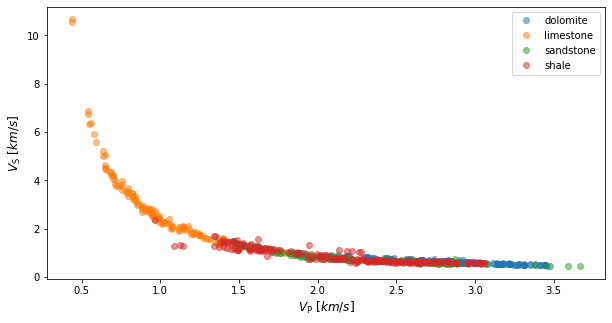

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

for name, group in liths:
    ax.plot(
        group["Vs [km/s]"], 
        group["Vp [km/s]"], 
        marker='o', 
        linestyle='',
        ms=6, 
        label=name, 
        alpha=0.5       # transparency / trasparencia
    )

ax.legend(loc=1)

plt.xlabel('$V_\mathrm{P}\ [km/s]$', size=12)
plt.ylabel('$V_\mathrm{S}\ [km/s]$', size=12)
plt.show()

**Plot the _density_ / Grafico la _densidad_**

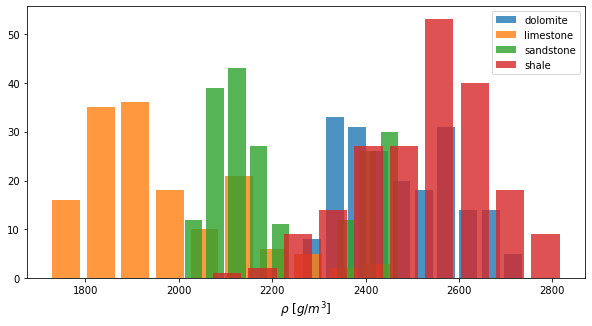

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
for name, group in liths:
    plt.hist(
        group["Rho [kg/m³]"], 
        histtype='bar', 
        stacked=True, 
        rwidth=0.8, 
        alpha=0.8, 
        label=name
    )
    
plt.legend()
plt.xlabel('$\\rho\ [g/m^3]$', size=12)
plt.show()

## Homework

In this oportunity, we share with you a DataFrame with the bathymetry and gravity disturbance profile of the island of Oahu in Hawaii.

**Steps:**
1. Load the file.
2. Clean the DataFrame, so check if the DataFrame has:
    * nans values and remove them.
    * duplicate rows and remove them.
    * any other problems like out of range values and remove them.
3. Plot the _gravity disturbance & distance_ and the _bathimetry & distance_ using `subplot`.
   Make the plot as if you were going to put it in an article. 

---

En esta oportunidad, compartimos contigo un DataFrame con el perfil de batimetría y perturbación de la gravedad de la isla de Oahu en Hawaii.

**Pasos:**
1. Cargue el archivo.
2. Limpie el DataFrame verificando si el DataFrame tiene:
    * valores nans y elimínelos.
    * filas duplicadas y eliminarlas.
    * cualquier otro problema como valores fuera de rango y elimínelos.
3. Grafique la _gravity disturbance & distance_ y _bathimetry & distance_ usando `subplot`.
   Haga las graficas como si fuera a ponerla en un artículo.


### Bonus track

We can see from the bathymetry profile that there is a long-wavelength component (almost a gaussian shape) right around the islands.
This is due to the _thermal swell_ of the hotspot and not part of the flexure response of the oceanic lithosphere.
The swell is isostatically compensanted, as seen in the gravity disturbance.
We'll fit a gaussian curve to the profile data and remove it from our observations to obtain a residual.

**Steps:**
1. Define the gaussian function:
   $$ h_{gauss} (x) = h_{0} + G \exp \left(-\dfrac{(x - x_0)^2}{\sigma^2}\right) $$
    
2.  Estimate the parameters of this function ($h_0$, $G$, $x_0$, $\sigma$). You can start with ($h_0$, $G$, $x_0$, $\sigma$) = (hawaii.distance_km, h0=-5.5, G=1.5, x0=1300, sigma=450).
3. Calculate the thermal swell.
4. Calculate a residual topography and store it in our original `DataFrame`.
   $$ residual = topography_{km} - swell$$
5. Make the plot using `subplot` as if you were going to put it in an article. 

---

Podemos ver en el perfil de batimetría que hay un componente de longitud de onda larga (casi una forma gaussiana) alrededor de las islas.
Esto se debe al _oleaje térmico_ del hotspot y no es parte de la respuesta de flexión de la litosfera oceánica.
El oleaje se compensa isostáticamente, como se ve en la perturbación de la gravedad.
Ajustaremos una curva gaussiana a los datos del perfil y la eliminaremos de nuestras observaciones para obtener un residuo.

**Pasos:**
1. Defina la función gaussiana:
   $$h_{gauss} (x) = h_{0} + G \exp \left(-\dfrac{(x - x_0)^2}{\sigma^2}\right)$$
    
2. Estime los parámetros de esta función (($h_0$, $G$, $x_0$, $\sigma$). Puede comenzar con $h_0$, $G$, $x_0$, $\sigma$) = (hawaii.distance_km, h0=-5.5, G=1.5, x0=1300, sigma=450).
3. Calcule el oleaje térmico.
4. Calcule una topografía residual y guárdela en el `DataFrame` original.
   $$ residual = topografia_ {km} - swell $$
5. Grafique los resultados usando `subplot` como si fueras a ponerla en un artículo.

## Extra material to keep learning / Material extra para seguir aprendiendo

**Pandas** is very powerful and has many more functionalities. Check out their documentation and tutorials to learn much more.

---

**Pandas** es muy potente y tiene muchas mas funcionalidades. Revise su documentación y tutoriales para aprender mucho mas. 

* [Pandas documentation](https://pandas.pydata.org/docs/getting_started/index.html)
* [Intro to Python by GeoLatinas](https://github.com/GeoLatinas/Intro-to-python)
* [Pandas: Python Data Analysis Library](https://johnfoster.pge.utexas.edu/numerical-methods-book/ScientificPython_Pandas.html)


**Other interesting libraries / Otras librerias interesantes**

If you got here and you want to continue learning python libraries that can help you with your studies or research in earth science, we leave you some libraries that could be useful fot you:

---

Si llegaste hasta acá y querés seguir aprendiendo paquetes que puedan ayudarte a tus estudios o investigaciones en ciencia de la tierra, te dejamos algunas librerías que podrían serte útiles:

* [Xarray](https://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. 
  It is inspired by and borrows heavily from pandas.
  It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing.
  
* [PyGMT](https://www.pygmt.org/dev/) is a library for processing geospatial and geophysical data and making publication quality maps and figures. 
  It provides a Pythonic interface for the Generic Mapping Tools (GMT), a command-line program widely used in the Earth Sciences.
  
* [pyproj](https://pyproj4.github.io/pyproj/stable/) is a python interface to [PROJ](https://proj.org/) (cartographic projections and coordinate transformations library).

* [Seaborn](https://seaborn.pydata.org/) is a data visualization library based on matplotlib. 
  It provides a high-level interface for drawing attractive and informative statistical graphics.
